In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,accuracy_score
from matplotlib.colors import ListedColormap

### About the Dataset
1. Gender - Gender of the passengers (Female, Male).
2. Customer - Type The customer type (Loyal customer, disloyal customer).
3. Age - The actual age of the passengers Numerical.
4. Type of Travel - Purpose of the flight of the passengers (Personal Travel, Business Travel.
5. Class - Travel class in the plane of the passengers (Business, Eco, Eco Plus).
6. Flight distance - The flight distance of this journey.
7. Inflight Wi-Fi service - Satisfaction level of the inflight Wi-Fi service.
8. Departure/Arrival time convenient - Satisfaction level of Departure/Arrival time Category.
9. Ease of Online booking - Satisfaction level of online booking.
10. Gate location - Satisfaction level of Gate location.
11. Food and drink - Satisfaction level of Food and drink.
12. Online boarding - Satisfaction level of online boarding.
13. Seat comfort - Satisfaction level of Seat comfort.
14. Inflight entertainment - Satisfaction level of inflight entertainment.
15. On-board service - Satisfaction level of On-board service.
16. Leg room service - Satisfaction level of Leg room service.
17. Baggage handling - Satisfaction level of baggage handling.
18. Check-in service - Satisfaction level of Check-in service.
19. Inflight service - Satisfaction level of inflight service.
20. Cleanliness - Satisfaction level of Cleanliness.
21. Departure Delay in Minutes - Minutes delayed when departure.
22. Arrival Delay in Minutes - Minutes delayed when Arrival.

In [2]:
df1 = pd.read_csv(r'D:\Simplilearn all projects\Data\air_passenger_train\train.csv')

In [3]:
df2 = pd.read_csv(r'D:\Simplilearn all projects\Data\air_passenger_test\test.csv')

In [4]:
df = pd.concat([df1,df2]).reset_index(drop=True)

In [5]:
# Lets see the Data dimensions
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
# Lets see the Data types
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [7]:
#Lets see the column names 
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
# Check for information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [9]:
# Lets check for Null Values
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [10]:
# Lets check for percentage of null values in each column where null are present 
(df.isnull().sum()/df.shape[0])*100

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

In [11]:
# Lets check for 5 point for Summary
df.describe().round(2)

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129487.00
mean,44158.70,64940.50,39.43,1190.32,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.31,3.64,3.29,14.71,15.09
std,31207.38,37493.27,15.12,997.45,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.07,38.47
min,0.00,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,16234.75,32470.75,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,38963.50,64940.50,40.00,844.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,71433.25,97410.25,51.00,1744.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,103903.00,129880.00,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [12]:
# Lets see the 5 point summary for categorical data 
df.select_dtypes(np.object).describe()

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


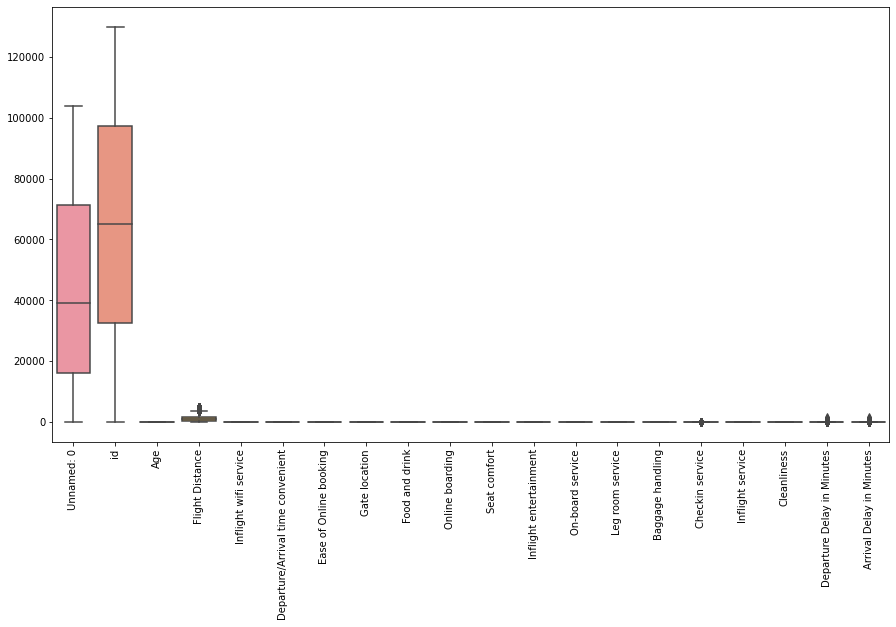

In [13]:
### Lets check for presence of outliers in the Data
plt.figure(figsize=(15,8)) 
sns.boxplot(data=df) 
plt.xticks(rotation=90) 
plt.show()

In [14]:
#As we can see from boxplot there are outliers present in several columns
#1.Flight Distance
#2.Checkin Services
#3.Departure delay in Minutes
#4.Arrival Delay in Minutes

In [15]:
df1=df

In [16]:
df1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [17]:
# Coverting some columns data types to object so that its catagorical summary can be seen
for i in df1.iloc[:,9:23].columns:
    df1[i] = df1[i].astype(object)

In [18]:
df1.select_dtypes(np.object).describe()

,Gender,Customer Type,Type of Travel,Class,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
count,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,5,6,6,6,466,2
top,Female,Loyal Customer,Business travel,Business,4,3,3,4,4,4,4,4,4,4,4,4,4,0,neutral or dissatisfied
freq,65899,106100,89693,62160,31880,30393,35717,30563,38468,39756,36791,38703,35886,46761,36333,47323,33969,73356,73452


#### Key Observations
1 Gender - There are 2 classes in gender and females are more as compared to males.

2 Customer Type - There are 2 classes in Customer type and loyal customers are more as compared to disloyal
Customer.

3 Type of Travel - There are 2 classes in Type of Travel and Business Travel are more as compared to Personal Travel.

4 Class - There are 3 classes in Class and Business class is more preferred one.

5 Inflight wifi service - There are 6 types of ratings for inflight wifi service from scales of 0 to 5 and most given rating is 2 so there is need of some serious improvement for Inflight wifi service .

6 Departure/Arrival time convenient - There are 6 types of ratings for Departure/Arrival time convenient from scale of 0 to 5 and most given is rating is 4 and that is a satifactory rating .

7 Ease of Online booking - There are 6 types of ratings for Ease of Online booking from scales of 0 to 5 and most given rating is 3 so there is a good room for improvement in Ease of Online booking .

8 Gate location - There are 6 types of ratings for Gate location from scales of 0 to 5 and most given rating is 3 so there is a good room for improvement in Gate location .

9 Food and drink - There are 6 types of ratings for Food and drink from scale of 0 to 5 and most given is rating is 4 and that is a satifactory rating .

10 Online boarding - There are 6 types of ratings for Online boarding from scale of 0 to 5 and most given is rating is 4 and that is a satifactory rating .

11 Seat comfort - There are 6 types of ratings for Seat comfort from scale of 0 to 5 and most given is rating is 4 and that is a satifactory rating .

12 Inflight entertainment - There are 6 types of ratings for Inflight entertainment from scale of 0 to 5 and most given is rating is 4 and that is a satifactory rating .

13 On-board service - There are 6 types of ratings for On-board service from scale of 0 to 5 and most given is rating is 4 and that is a satifactory rating .

14 Leg room service - There are 6 types of ratings for Leg room service from scale of 0 to 5 and most given is rating is 4 and that is a satifactory rating .

15 Baggage handling - There are 6 types of ratings for Baggage handling from scale of 0 to 5 and most given is rating is 4 and that is a satifactory rating .

16 Checkin service - There are 6 types of ratings for Checkin service from scale of 0 to 5 and most given is rating is 4 and that is a satifactory rating .

17 Inflight service - There are 6 types of ratings for Inflight service from scale of 0 to 5 and most given is rating is 4 and that is a satifactory rating .

18 Cleanliness - There are 6 types of ratings for Cleanliness from scale of 0 to 5 and most given is rating is 4 and that is a satifactory rating .

19 satisfaction - There are two categories in satisfaction that are satisfied and neutral or dissatisfied and most given one is neutral or dissatisfied . It can be inferred from given data that more people tend to be neutral or dissatisfied from airline serices so this should be brought to attention and improvements need be made .

In [19]:
# Lets check for presence of class balance or imbalance in target variable
(df1['satisfaction'].value_counts()/df1.shape[0])*100

neutral or dissatisfied    56.553742
satisfied                  43.446258
Name: satisfaction, dtype: float64

([<matplotlib.patches.Wedge at 0x2262eb50850>,
 [Text(-0.22488421808296186, 1.0767669610724575, 'Neutral or dissatisfied'),
  Text(0.22488411726876187, -1.0767669821276329, 'Satisfied')],
 [Text(-0.12266411895434282, 0.5873274333122495, '56.6%'),
  Text(0.12266406396477919, -0.5873274447968906, '43.4%')])

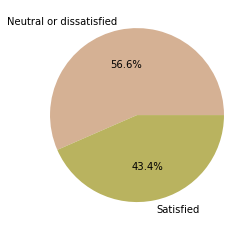

In [20]:
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("gist_earth_r"), autopct = '%1.1f%%')

### Exploratory Data Analysis -

In [21]:
df1.head(1)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied


In [22]:
# We are dropping these columns as they won't help in any further analysis
df1 = df1.drop(['id','Unnamed: 0'],axis=1)

In [23]:
#Lets check for data dimensions 
df1.shape

(129880, 23)

In [24]:
# We are converting out target classes to 0 and 1
df1["satisfaction"].replace("neutral or dissatisfied",0,inplace = True)
df1["satisfaction"].replace("satisfied",1,inplace = True)

In [25]:
df1.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient     object
Ease of Online booking                object
Gate location                         object
Food and drink                        object
Online boarding                       object
Seat comfort                          object
Inflight entertainment                object
On-board service                      object
Leg room service                      object
Baggage handling                      object
Checkin service                       object
Inflight service                      object
Cleanliness                           object
Departure Delay in Minutes            object
Arrival Delay in Minutes             float64
satisfacti

#### Why Outlier Treatment
As we can see that in Departure delay in minutes , the 50% quantile is 0 minutes delay and 75% quantile is 12 minutes delay and average minutes delay is also 14 minutes including all data but when we see that the maximum of delay is going till 1592 minutes which is very far from the mean which is still including these outliers and same goes for arrival delay in minute the 50% quantile is 0 minutes delay and 75% quantile is 13 minutes delay and average minutes delay is also 15 minutes including all data but when we see that the maximum of delay is going till 1584 minutes which is very far from the mean which is still including these outliers so these outliers can affect our analysis in a very extreme way and they can negatively affect the statistical analysis but also the training process of machine learning algorithm resulting into lower accuracy so we will remove them from our analysis .

In [26]:
# Lets find out Quantile 1 Quartile 2 and Inter quartile range for outlier treatment
#Q1
Q1 = df1.quantile(.25)
#Q2
Q3 = df1.quantile(.75)
#IQR
IQR=Q3-Q1

In [27]:
df2 = df1[~((df1<(Q1-1.5*IQR))|(df1>(Q3+1.5*IQR))).any(axis=1)]

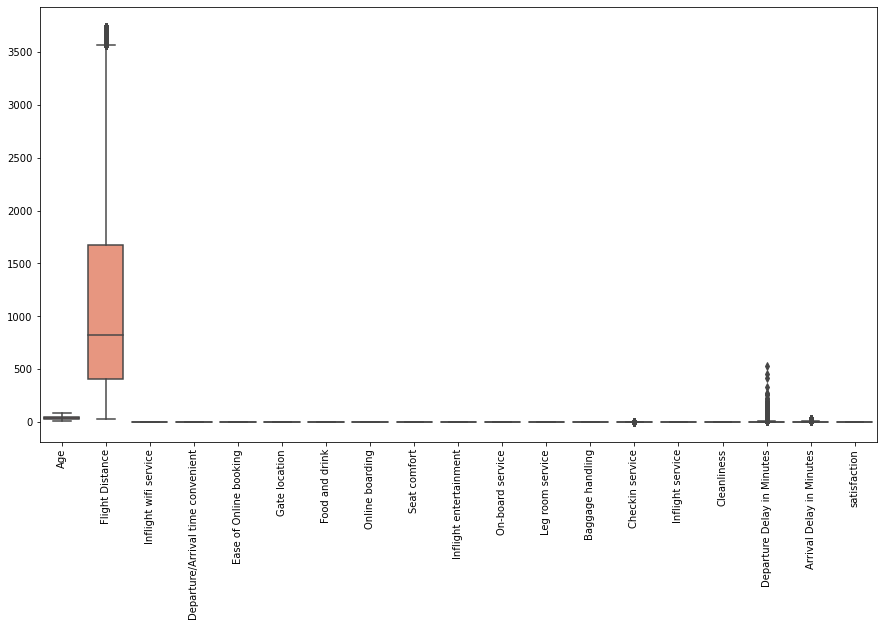

In [28]:
#Lets check if the outliers are removed
fig=plt.figure(figsize=(15,8))
sns.boxplot(data=df2)
plt.xticks(rotation=90)
plt.show()

In [29]:
# as the outliers are still present lets find out the data dimensions if the data is reduced 
df2.shape

(109927, 23)

In [30]:
df2

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


In [31]:
# The number of rows in actual are 106749 ,however in the data the index range is till 129879 so we need to reset 
# the index
df2=df2.reset_index()

In [32]:
# Drop the existing index
df2.drop('index',axis=1,inplace=True)
df2

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109922,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
109923,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
109924,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
109925,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


###### As the data rows are reduced we can say that some outliers were removed from the data but still some outliers are present in the data but we can't remove them further as that will result into data loss so we will proceed with this data

### Missing Value Treatment -

In [33]:
# Check for Null values
df2.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             385
satisfaction                           0
dtype: int64

In [34]:
#Lets replace the string type null values with numpy null values so the null treatment can be done efficiently 
df2.replace({'NaN':np.nan},inplace=True)

In [35]:
df2.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             385
satisfaction                           0
dtype: int64

In [36]:
# Null imputed
df2['Arrival Delay in Minutes']=df2['Arrival Delay in Minutes'].fillna(df2['Arrival Delay in Minutes'].median())
# We imputed it through median as even after doing outlier treatment ,we still got some outliers in the data ,
# so we decided to impute it by median as mean is sensitive to outliers

In [37]:
df2.isnull().sum()
# We can see that all the null values have became zero so all the null values have been imputed .

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [38]:
df2.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [39]:
for i in df2.iloc[:,6:20].columns:
    df2[i] = df2[i].astype(object)

### Univariate Analysis

In [40]:
# Here we seperated stored the numerical columns into df_num for further analysis
df_num = df2[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]

In [41]:
# Here we seperated stored the categorical columns into df_cat for further analysis
df_cat = df2[['Gender', 'Customer Type','Type of Travel', 'Class','Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction']]

In [42]:
#Lets check for the dimensions of df_num
df_num.shape

(109927, 4)

In [43]:
#Lets check for the dimensions of df_cat
df_cat.shape

(109927, 19)

#### Bivariate Analysis
##### 1) Numerical v/s Numerical

In [44]:
df_num.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,25,18.0
1,25,235,1,6.0
2,26,1142,0,0.0
3,25,562,11,9.0
4,61,214,0,0.0


#### Lets visualize out numerical data with scatterplot

<Figure size 1440x1440 with 0 Axes>

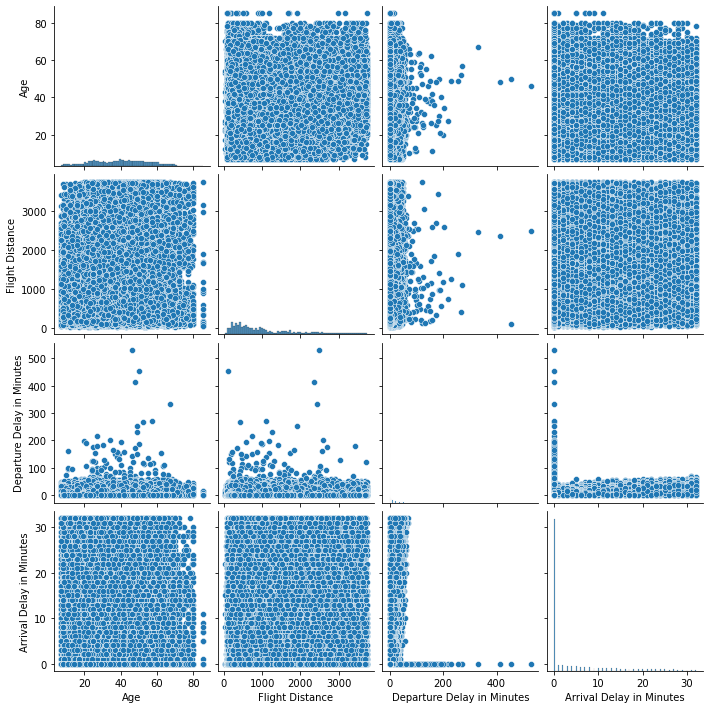

In [45]:
plt.figure(figsize=(20,20)) 
sns.pairplot(df_num) 
plt.show()

#### Key Observation
We can say that there is no clear pattern in the above scatter plots , lets carify it further with the help of other plots.

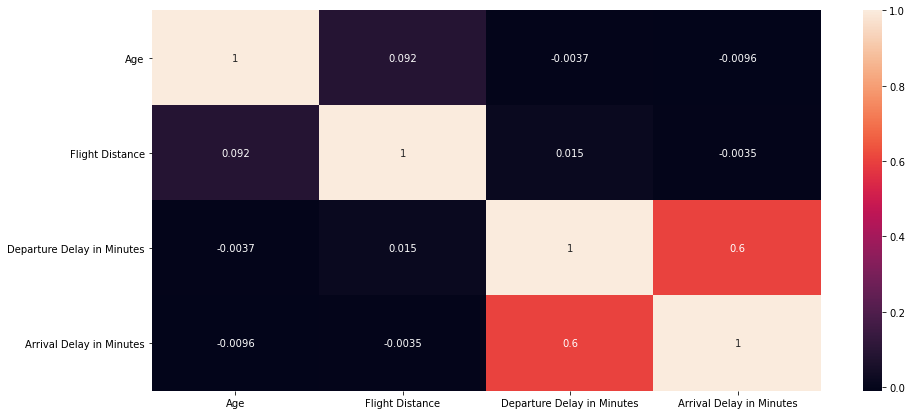

In [46]:
# Lets check the relationship between our numerical data with the help of heat map
plt.figure(figsize=(15,7))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

##### Key Observations
From the above heatmap we can see that there is a positive correlation of 0.58 between Departure Delay in Minutes and Arrival delay in minutes . There is no good correlation between the other numerical columns .

#### 2) Numerical v/s Categorical

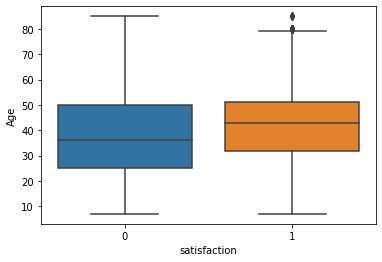

In [47]:
# Lets check if there is a pattern between age and the satisfaction of the customer
sns.boxplot(df_cat['satisfaction'],df_num['Age'])
plt.show()
# No as such pattern is found here

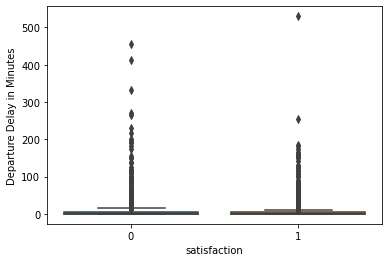

In [48]:
# Lets check if there is a pattern between departure delay in minutes and the satisfaction of the customer
sns.boxplot(df_cat['satisfaction'],df_num['Departure Delay in Minutes'])
plt.show()
# There is a minor patern that as the

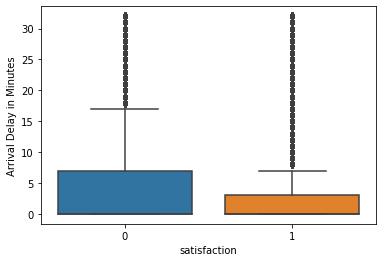

In [49]:
# Lets check if there is a pattern between arrival delay in minutes and the satisfaction of the customer
sns.boxplot(df_cat['satisfaction'],df_num['Arrival Delay in Minutes'])
plt.show()
# There is a pattern that as the arrival delay in minutes increases people tend more to be dissatisfied or neutral

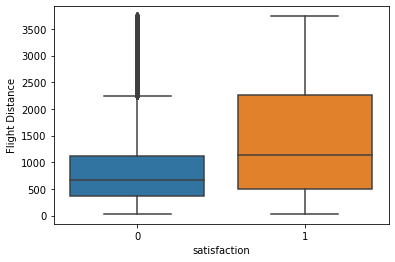

In [50]:
# Lets check if there is a pattern between flight distance and the satisfaction of the customer
sns.boxplot(df_cat['satisfaction'],df_num['Flight Distance'])
plt.show()
# People tend to be more satisfied as flight distance increases.

In [51]:
df2.groupby('satisfaction')['Age'].describe().round(2)
# No definite pattern

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
0,61686.0,37.64,16.49,7.0,25.0,36.0,50.0,85.0
1,48241.0,41.60,12.97,7.0,32.0,43.0,51.0,85.0


In [52]:
df2.groupby('satisfaction')['Departure Delay in Minutes'].describe().round(2)
# No definite pattern

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
0,61686.0,4.95,10.28,0.0,0.0,0.0,6.0,455.0
1,48241.0,4.01,9.10,0.0,0.0,0.0,4.0,530.0


In [53]:
df2.groupby('satisfaction')['Arrival Delay in Minutes'].describe().round(2)
# Our above inference from boxplot is confirmed by this as Arrival Delay in Minutes increases people tend to be
# dissatisfied or neutral

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
0,61686.0,4.66,7.95,0.0,0.0,0.0,7.0,32.0
1,48241.0,3.35,6.92,0.0,0.0,0.0,3.0,32.0


In [54]:
df2.groupby('satisfaction')['Flight Distance'].describe().round(2)
# From the below observation we can say that if the distance is greater than the passenger is more satisfied.

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
0,61686.0,900.35,738.00,31.0,370.0,667.0,1123.0,3738.0
1,48241.0,1429.04,1042.79,31.0,496.0,1136.0,2265.0,3739.0


#### 3) Categorical v/s Categorical

##### we can use cross tab when working with categorical vs categorical

In [55]:
tb1 = pd.crosstab(df_cat['Gender'],df_cat['satisfaction'])
tb1

satisfaction,0,1
Gender,,
Female,31573,24197
Male,30113,24044


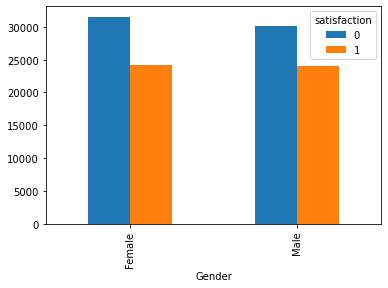

In [56]:
tb1.plot(kind='bar')
plt.show()

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109927 entries, 0 to 109926
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             109927 non-null  object 
 1   Customer Type                      109927 non-null  object 
 2   Age                                109927 non-null  int64  
 3   Type of Travel                     109927 non-null  object 
 4   Class                              109927 non-null  object 
 5   Flight Distance                    109927 non-null  int64  
 6   Inflight wifi service              109927 non-null  object 
 7   Departure/Arrival time convenient  109927 non-null  object 
 8   Ease of Online booking             109927 non-null  object 
 9   Gate location                      109927 non-null  object 
 10  Food and drink                     109927 non-null  object 
 11  Online boarding                    1099

In [58]:
df2[['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Age']] = df2[['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Age']].astype(np.number)

#### Data Preparation for Modeling -

In [59]:
#lets store categorical data type 
cat=df2.select_dtypes(np.object)
cat

,Gender,Customer Type,Type of Travel,Class
0,Male,Loyal Customer,Personal Travel,Eco Plus
1,Male,disloyal Customer,Business travel,Business
2,Female,Loyal Customer,Business travel,Business
3,Female,Loyal Customer,Business travel,Business
4,Male,Loyal Customer,Business travel,Business
...,...,...,...,...
109922,Male,disloyal Customer,Business travel,Business
109923,Male,Loyal Customer,Business travel,Business
109924,Female,Loyal Customer,Personal Travel,Eco
109925,Male,Loyal Customer,Business travel,Business


In [60]:
# dummies done for the categorical data type 
x_cat=pd.get_dummies(cat,drop_first=True)

In [61]:
x_cat.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1,0,1,0,1
1,1,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,0,0,0,0


In [62]:
# numerical data type selected 
x_num = df2.select_dtypes(np.number)

In [63]:
# both dummies and numerical data type are concated into one dataframe
x1 = pd.concat([x_num,x_cat],axis=1)

In [64]:
x2 = x1.drop("satisfaction",axis=1)

In [65]:
x = sm.add_constant(x2)

In [66]:
#our target variable
y = df2['satisfaction']

#### Train Test Split -

In [67]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [68]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(76948, 24) (32979, 24) (76948,) (32979,)


In [69]:
model=sm.Logit(ytrain,xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.338199
         Iterations 7


In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                76948
Model:                          Logit   Df Residuals:                    76924
Method:                           MLE   Df Model:                           23
Date:                Fri, 26 Aug 2022   Pseudo R-squ.:                  0.5068
Time:                        20:32:23   Log-Likelihood:                -26024.
converged:                       True   LL-Null:                       -52765.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -5.3900      0.087    -62.034      0.000      -5.560      -5.220
Age                                  -0.0091      0.001    -11.184      0.000      -0.011      -0.008
Flight Distance                   -1.395e-05    1.4e-05     -0.995      0.320   -4.14e-05    1.35e-05
Inflight wifi service                 0.4474      0.013     33.325      0.000       0.421       0.474
Departure/Arrival time convenient    -0.1491      0.009    -15.955      0.000      -0.167      -0.131
Ease of Online booking               -0.1635      0.013    -12.388      0.000      -0.189      -0.138
Gate location                         0.0252      0.010      2.414      0.016       0.005       0.046
Food and drink                       -0.0656      0.013     -5.140      0.000      -0.091      -0.041
Online boarding                       0.5772      0.012     49.079      0.000       0.554       0.600
Seat comfort                          0.0823      0.013      6.372      0.000       0.057       0.108
Inflight entertainment                0.0280      0.017      1.630      0.103      -0.006       0.062
On-board service                      0.3094      0.012     26.048      0.000       0.286       0.333
Leg room service                      0.2559      0.010     26.319      0.000       0.237       0.275
Baggage handling                      0.1162      0.013      8.862      0.000       0.090       0.142
Checkin service                       0.3204      0.010     32.646      0.000       0.301       0.340
Inflight service                      0.1106      0.014      7.912      0.000       0.083       0.138
Cleanliness                           0.2521      0.014     17.730      0.000       0.224       0.280
Departure Delay in Minutes            0.0001      0.001      0.088      0.930      -0.003       0.003
Arrival Delay in Minutes             -0.0360      0.002    -18.833      0.000      -0.040      -0.032
Gender_Male                           0.0508      0.022      2.260      0.024       0.007       0.095
Customer Type_disloyal Customer      -2.0906      0.034    -60.720      0.000      -2.158      -2.023
Type of Travel_Personal Travel       -2.6776      0.036    -75.206      0.000      -2.747      -2.608
Class_Eco                            -0.7178      0.030    -24.302      0.000      -0.776      -0.660
Class_Eco Plus                       -0.7781      0.047    -16.381      0.000      -0.871      -0.685
=====================================================================================================
"""

In [71]:
#Lets get the pvalues of the features
pvalue = pd.DataFrame(model.pvalues)

In [72]:
#Significant Festures which are having pvalue less than 0.05
pvalue[pvalue[0]>0.05].index

Index(['Flight Distance', 'Inflight entertainment',
       'Departure Delay in Minutes'],
      dtype='object')

In [73]:
#new_xtrain with significant features
xtrain.drop(['Flight Distance', 'Inflight entertainment',
       'Departure Delay in Minutes'],axis=1,inplace=True)

In [74]:
#new_xtest with significant features
xtest.drop(['Flight Distance', 'Inflight entertainment',
       'Departure Delay in Minutes'],axis=1,inplace=True)

#### Model Fitting -
##### Logistic Model With significant variable -

In [75]:
model1 = sm.Logit(ytrain,xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.338223
         Iterations 7


In [76]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                76948
Model:                          Logit   Df Residuals:                    76927
Method:                           MLE   Df Model:                           20
Date:                Fri, 26 Aug 2022   Pseudo R-squ.:                  0.5068
Time:                        20:32:24   Log-Likelihood:                -26026.
converged:                       True   LL-Null:                       -52765.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -5.4459      0.081    -67.023      0.000      -5.605      -5.287
Age                                  -0.0090      0.001    -11.073      0.000      -0.011      -0.007
Inflight wifi service                 0.4513      0.013     34.017      0.000       0.425       0.477
Departure/Arrival time convenient    -0.1504      0.009    -16.144      0.000      -0.169      -0.132
Ease of Online booking               -0.1644      0.013    -12.468      0.000      -0.190      -0.139
Gate location                         0.0258      0.010      2.469      0.014       0.005       0.046
Food and drink                       -0.0575      0.012     -4.879      0.000      -0.081      -0.034
Online boarding                       0.5751      0.012     49.172      0.000       0.552       0.598
Seat comfort                          0.0876      0.012      7.031      0.000       0.063       0.112
On-board service                      0.3146      0.011     27.526      0.000       0.292       0.337
Leg room service                      0.2573      0.010     26.651      0.000       0.238       0.276
Baggage handling                      0.1200      0.013      9.277      0.000       0.095       0.145
Checkin service                       0.3175      0.010     32.875      0.000       0.299       0.336
Inflight service                      0.1172      0.013      8.732      0.000       0.091       0.143
Cleanliness                           0.2616      0.013     20.236      0.000       0.236       0.287
Arrival Delay in Minutes             -0.0359      0.002    -23.282      0.000      -0.039      -0.033
Gender_Male                           0.0495      0.022      2.206      0.027       0.006       0.094
Customer Type_disloyal Customer      -2.0925      0.033    -64.000      0.000      -2.157      -2.028
Type of Travel_Personal Travel       -2.6833      0.035    -76.902      0.000      -2.752      -2.615
Class_Eco                            -0.7043      0.028    -25.111      0.000      -0.759      -0.649
Class_Eco Plus                       -0.7633      0.046    -16.508      0.000      -0.854      -0.673
=====================================================================================================
"""

In [77]:
Ypred = model1.predict(xtest)

In [78]:
ypred = [ 0 if x < 0.5 else 1 for x in Ypred]

In [79]:
accuracy_score = print("Accuracy Score", accuracy_score(ytest,ypred))

Accuracy Score 0.8729191303556809


In [80]:
xpred = model1.predict(xtrain)
xpred = [ 0 if x < 0.5 else 1 for x in xpred]

In [81]:
print(classification_report(ytrain, xpred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     43155
           1       0.87      0.83      0.85     33793

    accuracy                           0.87     76948
   macro avg       0.87      0.87      0.87     76948
weighted avg       0.87      0.87      0.87     76948



In [82]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     18531
           1       0.87      0.83      0.85     14448

    accuracy                           0.87     32979
   macro avg       0.87      0.87      0.87     32979
weighted avg       0.87      0.87      0.87     32979



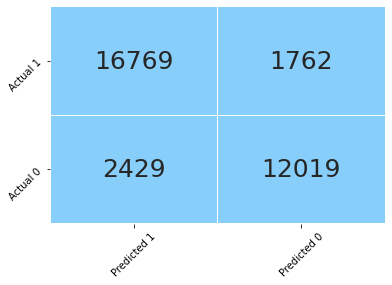

In [83]:
cm = confusion_matrix(ytest, ypred)

conf_matrix = pd.DataFrame(cm,columns = ['Predicted 1','Predicted 0'], index = ['Actual 1','Actual 0'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

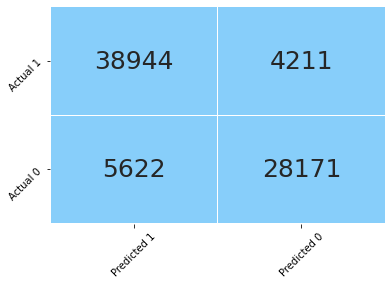

In [85]:
cm = confusion_matrix(ytrain, xpred)

conf_matrix = pd.DataFrame(cm,columns = ['Predicted 1','Predicted 0'], index = ['Actual 1','Actual 0'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

#### Now we are using Random forest classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()

In [94]:
rc.fit(xtrain,ytrain)

RandomForestClassifier()

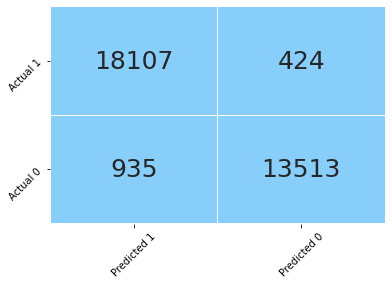

In [101]:
cm = confusion_matrix(ytest, rc.predict(xtest))

conf_matrix = pd.DataFrame(cm,columns = ['Predicted 1','Predicted 0'], index = ['Actual 1','Actual 0'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

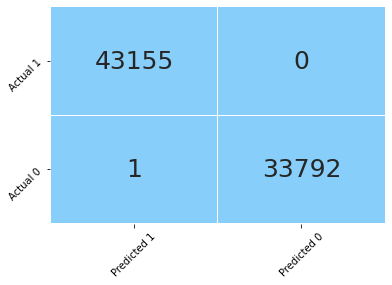

In [102]:
cm = confusion_matrix(ytrain, rc.predict(xtrain))

conf_matrix = pd.DataFrame(cm,columns = ['Predicted 1','Predicted 0'], index = ['Actual 1','Actual 0'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [103]:
print(classification_report(ytest,rc.predict(xtest)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     18531
           1       0.97      0.94      0.95     14448

    accuracy                           0.96     32979
   macro avg       0.96      0.96      0.96     32979
weighted avg       0.96      0.96      0.96     32979



In [104]:
print(classification_report(ytrain,rc.predict(xtrain)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43155
           1       1.00      1.00      1.00     33793

    accuracy                           1.00     76948
   macro avg       1.00      1.00      1.00     76948
weighted avg       1.00      1.00      1.00     76948



In [100]:
pd.DataFrame({'Actual':ytest, 'Predicted':rc.predict(xtest)})

,Actual,Predicted
63712,1,1
100811,0,0
95706,0,0
102307,0,0
79586,1,1
...,...,...
82049,0,0
63260,0,0
7658,0,0
51869,1,1
